In [211]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


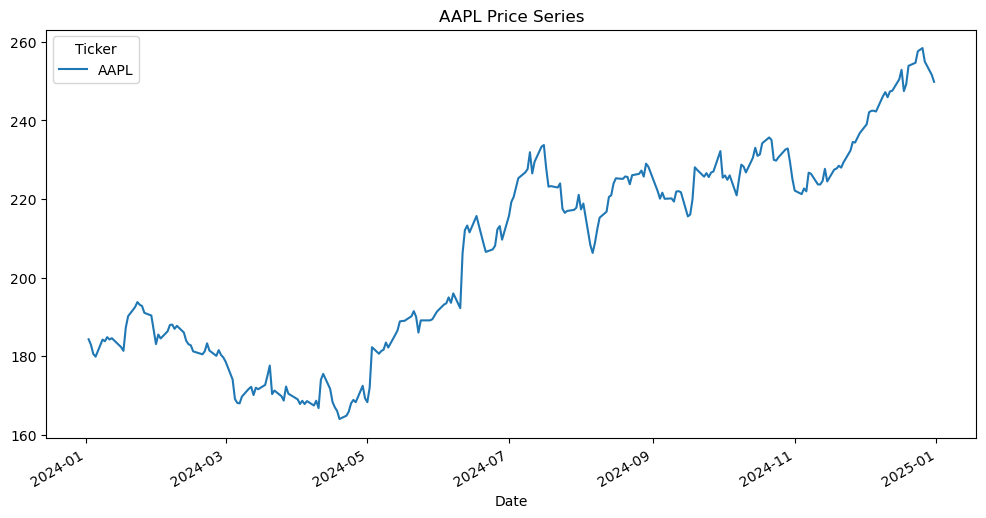

In [212]:
ticker = "AAPL"
data = yf.download(ticker, start="2024-01-01", end="2025-01-01")
prices = data['Close']
prices.plot(title=f"{ticker} Price Series")
plt.show()

In [213]:
prices = data['Close'].squeeze()  # converts pd dataframe into a series

price_diff = prices.diff().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()


In [215]:
mu_diff, std_diff = norm.fit(price_diff)
mu_ret, std_ret = norm.fit(log_returns)


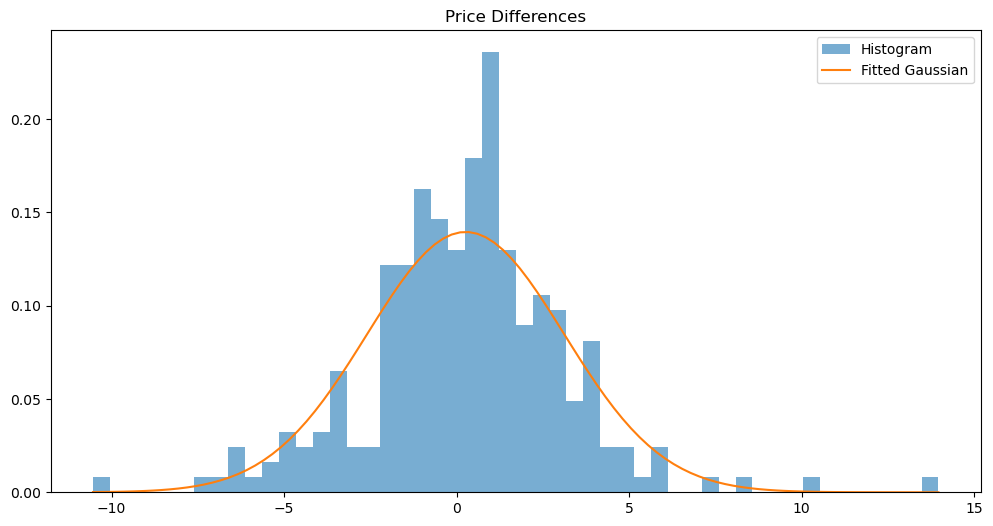

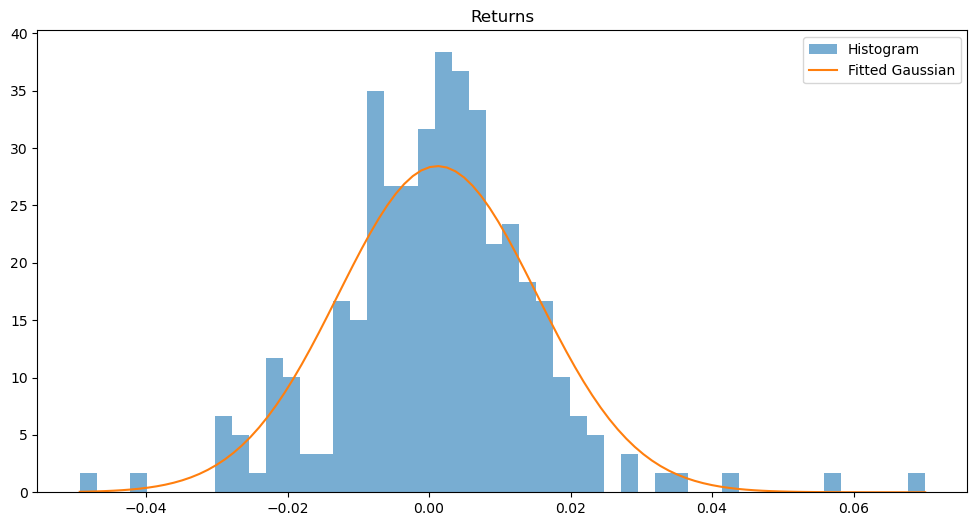

In [218]:


# Price differences
plt.hist(price_diff, bins=50, density=True, alpha=0.6, label="Histogram")
x = np.linspace(price_diff.min(), price_diff.max(), 100)
plt.plot(x, norm.pdf(x, mu_diff, std_diff), label="Fitted Gaussian")
plt.title("Price Differences")
plt.legend()
plt.show()

# Log Returns
plt.hist(log_returns, bins=50, density=True, alpha=0.6, label="Histogram")
x = np.linspace(log_returns.min(), log_returns.max(), 100)
plt.plot(x, norm.pdf(x, mu_ret, std_ret), label="Fitted Gaussian")
plt.title("Returns")
plt.legend()
plt.show()

In [219]:
n_days = len(prices)
n_paths = 5
initial_price = prices.iloc[0]
bachelier_paths = [np.cumsum(np.random.normal(mu_diff, std_diff, n_days)) + initial_price for _ in range(n_paths)]
samuelson_paths = [initial_price * np.cumprod(1 + np.random.normal(mu_ret, std_ret, n_days)) for _ in range(n_paths)]



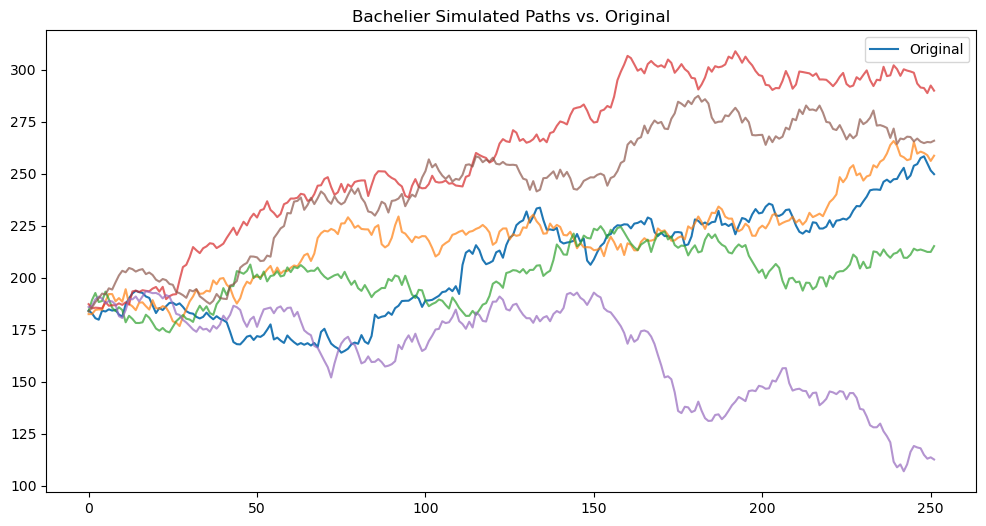

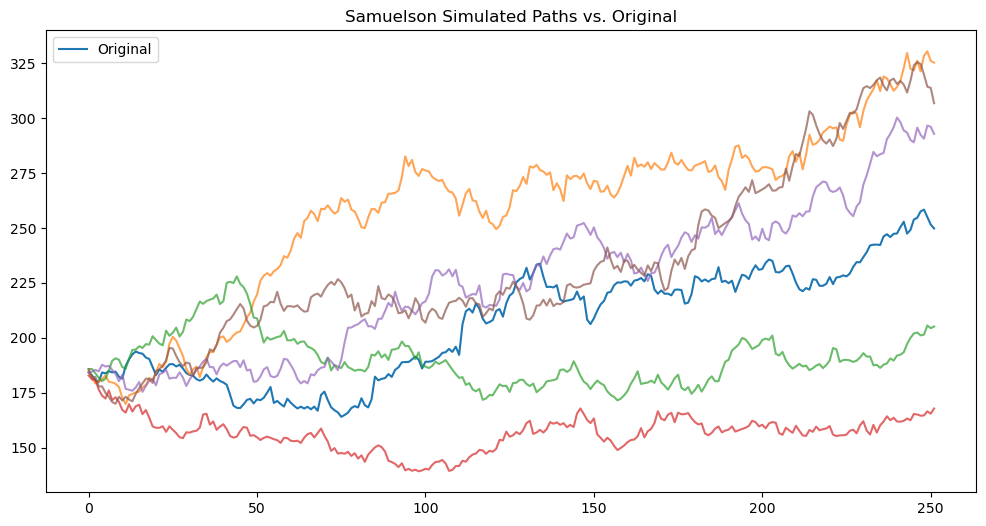

In [220]:
plt.plot(prices.values, label="Original")
for path in bachelier_paths:
    plt.plot(path, alpha=0.7)
plt.title("Bachelier Simulated Paths vs. Original")
plt.legend()
plt.show()

plt.plot(prices.values, label="Original")
for path in samuelson_paths:
    plt.plot(path, alpha=0.7)
plt.title("Samuelson Simulated Paths vs. Original")
plt.legend()
plt.show()


In [234]:

b_arr = np.vstack(bachelier_paths)      # shape = (n_paths, n_days)
s_arr = np.vstack(samuelson_paths)     # shape = (n_paths, n_days)

mean_bachelier   = b_arr.mean(axis=0)  
mean_samuelson  = s_arr.mean(axis=0)   


array([184.7092667 , 185.86050096, 188.17623359, 187.95397747,
       188.24861251, 190.04674997, 190.46476902, 189.50531078,
       188.87539952, 189.2974515 , 188.80963836, 189.70549473,
       190.17371861, 190.75834231, 190.11933981, 190.37298282,
       191.22191931, 191.52752875, 190.95442596, 191.26867272,
       189.6867056 , 188.63135542, 189.48584148, 188.06408982,
       187.18856313, 186.28337788, 185.10990205, 186.21121327,
       187.99115566, 188.06066663, 189.91301284, 190.64815495,
       191.92256402, 191.66669243, 191.17444946, 191.84751207,
       190.93620171, 192.61227937, 193.25176202, 194.4277467 ,
       196.61554649, 195.40082848, 198.22876229, 198.84468367,
       199.16105991, 201.20030196, 201.96070843, 202.0550858 ,
       204.47080428, 204.55444228, 203.46309793, 204.22556113,
       206.17960078, 206.98683442, 207.00100382, 207.2394323 ,
       208.82345073, 208.66489418, 209.73082261, 212.19999504,
       212.46244274, 213.45267371, 213.83671233, 214.40

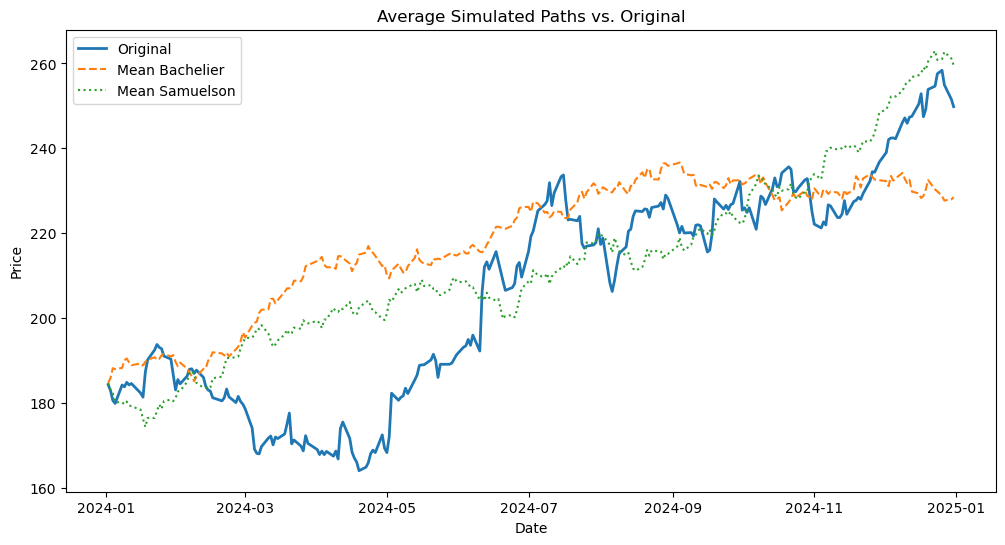

In [235]:
plt.plot(prices.index, prices ,label="Original",lw=2)
plt.plot(prices.index, mean_bachelier,  linestyle='--', label="Mean Bachelier")
plt.plot(prices.index, mean_samuelson, linestyle=':',  label="Mean Samuelson")
plt.legend()
plt.title("Average Simulated Paths vs. Original")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
